In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tkinter as tk
from tkinter import filedialog

In [2]:
data_dir = "A:/Jupyter/train"
data_dir = pathlib.Path(data_dir)

In [3]:
batch_size = 16
img_height = 224
img_width = 224

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,validation_split=0.2,subset="training",seed=123,
image_size=(img_height, img_width),batch_size=batch_size)

Found 2637 files belonging to 2 classes.
Using 2110 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,validation_split=0.2,subset="validation",seed=123,
image_size=(img_height, img_width),batch_size=batch_size)

Found 2637 files belonging to 2 classes.
Using 527 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['benign', 'malignant']


In [7]:
AUTOTUNE = tf.data.experimental.AUTOTUNE # it will decrease the time for training 

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
num_classes = 2

In [9]:
model= Sequential([
    layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),
    layers.Conv2D(16,3,padding='same',activation='relu'), # padding = 'same' means output is the same size as input. and kernal size (3 x 3)
                                                        # here we learn a total of 16 filters. Max pooling is then used to reduce the spatial dimensions of the output volume.
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'), # as we are going closer to the output ,, we learn more numbers of filter here is 32.
                                                        # whenever layers.Conv2D called previous layers.Conv2D become input for it . 
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),# final Conv2D layer learns 64 filters.
    layers.MaxPooling2D(),
    layers.Dropout(0.2), # Dropout’s purpose is to help your network generalize and not overfit. 
    
    # Fully connected layer
    layers.Flatten(), # it will convert 2d image array to 1d
    layers.Dense(64,activation='relu'), # (hidden layer) here we are catching 64 nodes that we passed it in the ConveD ,, if we reduse it to 50 or something else we may loss some features
    layers.Dense(num_classes) # (hidden layer) here all the 64 nodes connected to 2 output as it is number of classes 
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

In [11]:
noepochs=7
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
mymodel = model.fit(train_ds,validation_data=val_ds,epochs=noepochs)

acc = mymodel.history['accuracy']
val_acc = mymodel.history['val_accuracy']
loss = mymodel.history['loss']
val_loss=mymodel.history['val_loss']
epochs_range = range(noepochs)

Epoch 1/7
132/132 [==============================] - 72s 508ms/step - loss: 0.6904 - accuracy: 0.6280 - val_loss: 0.4874 - val_accuracy: 0.8008
Epoch 2/7
132/132 [==============================] - 67s 505ms/step - loss: 0.4684 - accuracy: 0.7763 - val_loss: 0.4280 - val_accuracy: 0.7932
Epoch 3/7
132/132 [==============================] - 69s 525ms/step - loss: 0.4314 - accuracy: 0.7877 - val_loss: 0.4201 - val_accuracy: 0.7970
Epoch 4/7
132/132 [==============================] - 69s 526ms/step - loss: 0.3965 - accuracy: 0.8009 - val_loss: 0.3568 - val_accuracy: 0.8235
Epoch 5/7
132/132 [==============================] - 68s 517ms/step - loss: 0.3752 - accuracy: 0.8100 - val_loss: 0.3831 - val_accuracy: 0.8121
Epoch 6/7
132/132 [==============================] - 67s 505ms/step - loss: 0.3718 - accuracy: 0.8090 - val_loss: 0.3591 - val_accuracy: 0.8292
Epoch 7/7
132/132 [==============================] - 67s 504ms/step - loss: 0.3159 - accuracy: 0.8408 - val_loss: 0.3284 - val_accuracy:

Text(0.5, 1.0, 'Training and Validation Accuracy')

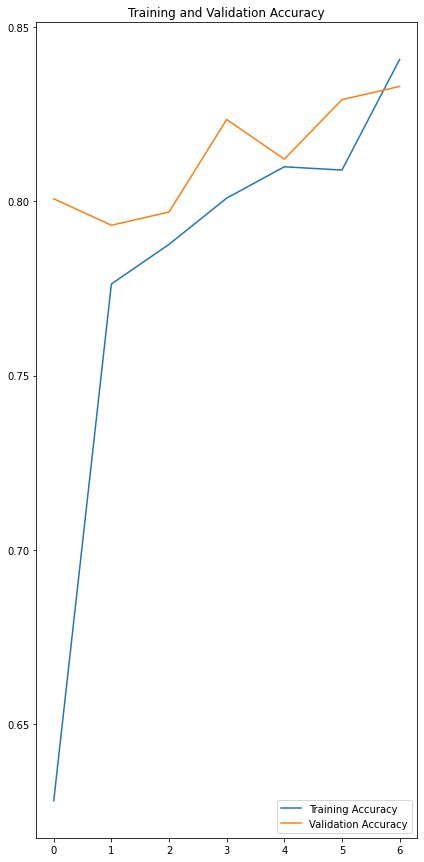

In [12]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

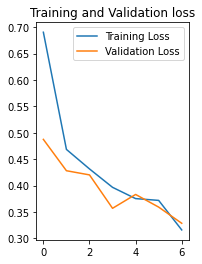

In [13]:
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')
plt.show()

In [14]:
def recogout():
    root = tk.Tk()
    root.withdraw()
    img_path = filedialog.askopenfilename()
    img = keras.preprocessing.image.load_img(img_path,target_size=(img_height,img_width))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array,0)
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    print("This image most likely belong to {} with a {:.2f} percent confidence".format(class_names[np.argmax(score)], 100 * np.max(score))
)

In [15]:
recogout()

This image most likely belong to benign with a 73.81 percent confidence


In [17]:
recogout()

This image most likely belong to malignant with a 95.48 percent confidence
